## Paquetes necesarios

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Cargar el paquete Yahoo Finance

In [8]:
!pip install yfinance

In [9]:
def preprocessing_yf(symbol):
  
  #Importar los datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Eliminar la columna adj close
  del df["adj close"]

  return df

In [12]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

### Descarga la serie de tiempo de la accción de Amazon

In [15]:
df = preprocessing_yf("AMZN")

[*********************100%***********************]  1 of 1 completed


In [17]:
df=df.asfreq('b') #bussiness day
df=df.fillna(method='ffill')

In [19]:
df.head()

,open,high,low,close,volume
time,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09
1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08
1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08
1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08
1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08


In [21]:
df.tail()

,open,high,low,close,volume
time,,,,,
2024-10-15,187.630005,188.410004,184.580002,187.690002,32178900.0
2024-10-16,187.050003,187.779999,185.610001,186.889999,23456800.0
2024-10-17,188.220001,188.940002,186.000000,187.529999,25039400.0
2024-10-18,187.149994,190.740005,186.279999,188.990005,37417700.0
2024-10-21,188.050003,189.460007,186.399994,189.070007,24612200.0


In [23]:
df.describe()

,open,high,low,close,volume
count,7158.000000,7158.000000,7158.000000,7158.000000,7.158000e+03
mean,38.536668,38.986682,38.047513,38.528991,1.361823e+08
std,55.074248,55.689865,54.393507,55.050869,1.367933e+08
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06
25%,2.083250,2.131125,2.050000,2.087750,6.366650e+07
50%,8.838000,8.927000,8.716750,8.840500,1.007730e+08
75%,58.601875,58.925376,58.069126,58.466624,1.555940e+08
max,200.089996,201.199997,199.050003,200.000000,2.086584e+09


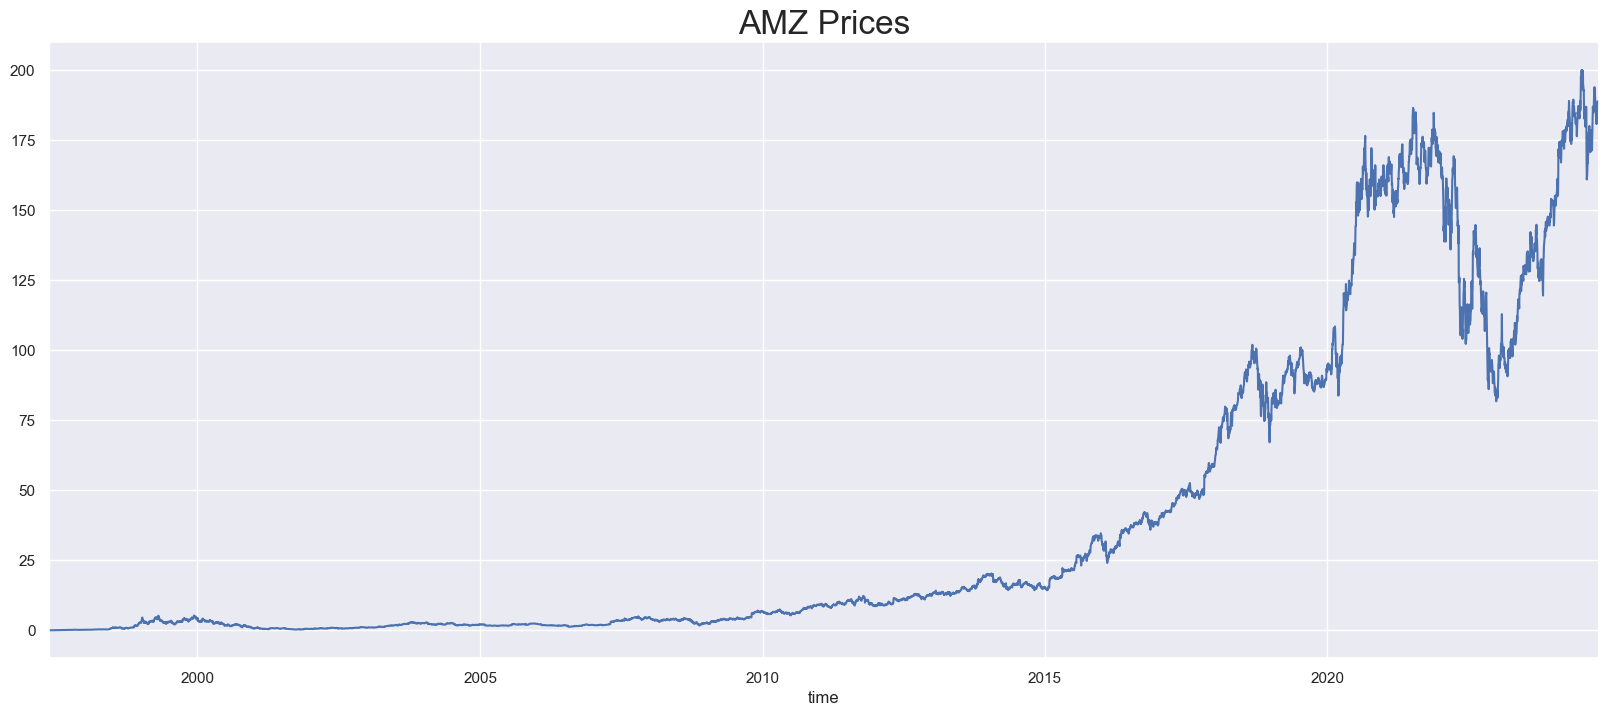

In [25]:
df.close.plot(figsize=(20,8))
plt.title("AMZ Prices", size = 24)
#plt.ylim(0,2300)
plt.show()

<Axes: xlabel='time'>

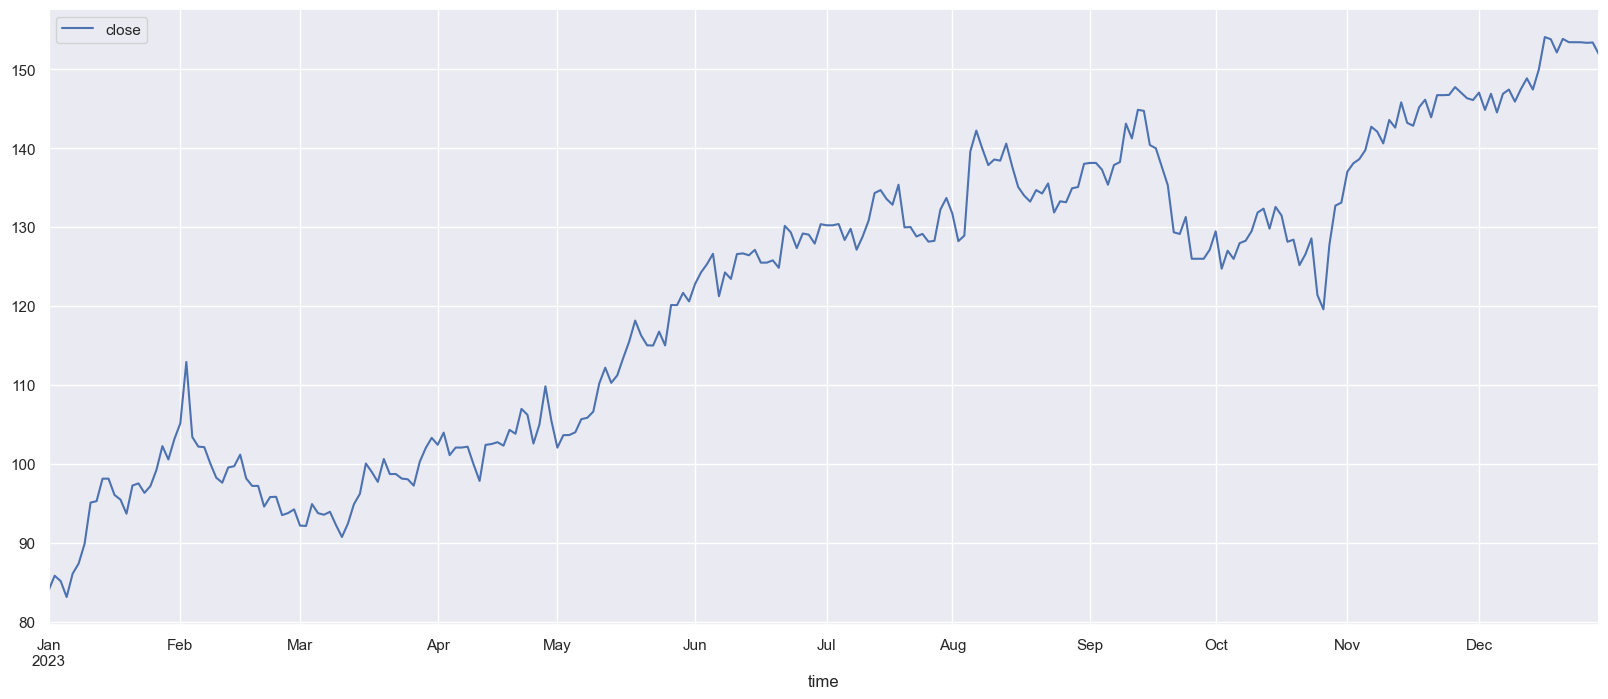

In [27]:
df[["close"]].loc["2023"].plot(figsize=(20,8))

## Prueba de estacionalidad de la serie de tiempo

Se calcula un estadístico de prueba ($\lambda_0$), que también se llama estadístico de constraste.

Este estadístico de prueba se compara con un valor crítico de la prueva ($\lambda_{critico}$).

Si $(\lambda_0 < \lambda_{critico})$ se rechaza $H_0$. Por tanto, la serie es estacionaria.

Otra forma es calculando el $p_{valor}$ con el cual se obtiene evidencia a favor de la hipótesis nula.

Si el $p_{valor}$ es cercano a cero, la probabilidad de aceptar la hipótesis nula es pequeña.

$\alpha =$ nivel de significancia.

$1 - \alpha =$ nivel de confianza.

$H_0: $ La series no es estacionaria.

Si $p_{valor} < \alpha $ se rechaza $H_0$. Por tanto, la serie es estacionaria.

In [64]:
vL = sts.adfuller(df.close)
vL

(1.157205162897186,
 0.995676454849642,
 29,
 7128,
 {'1%': -3.4312677408111187,
  '5%': -2.861945568852914,
  '10%': -2.566985880201976},
 24468.743460537757)

In [69]:
print(f'El estadístico de prueba es : {vL[0]}') # Estadístico de prueba

El estadístico de prueba es : 1.157205162897186


In [71]:
print(f'El pvalor es : {vL[1]}')

El pvalor es : 0.995676454849642


In [73]:
print(f'El período de tiempo en que se detecta autocorrelación es : {vL[2]}')

El período de tiempo en que se detecta autocorrelación es : 29


In [75]:
print(f'La cantidad de datos en la serie de tiempos es : {vL[3]}')

La cantidad de datos en la serie de tiempos es : 7128


In [77]:
print(f'Los valores críticos para cada nivel de significancia son : {vL[4]}')

Los valores críticos para cada nivel de significancia son : {'1%': -3.4312677408111187, '5%': -2.861945568852914, '10%': -2.566985880201976}


In [79]:
print(f'El criterio de información maximizado es : {vL[5]}')

El criterio de información maximizado es : 24468.743460537757


Para un nivel de confianza del 95%, la serie no es estacionaria

$1.1637150167781993  = \lambda_0 > -2.86194562577061 = \lambda_{critico}$

La $H_0: $ no debe ser rechazada.

La serie NO es estacionaria

In [81]:
sts.adfuller(df[["close"]].loc["2023"])

(-1.1633548962789848,
 0.6891576204336299,
 2,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 1118.6765775905042)

## Descomposición de la serie en componentes

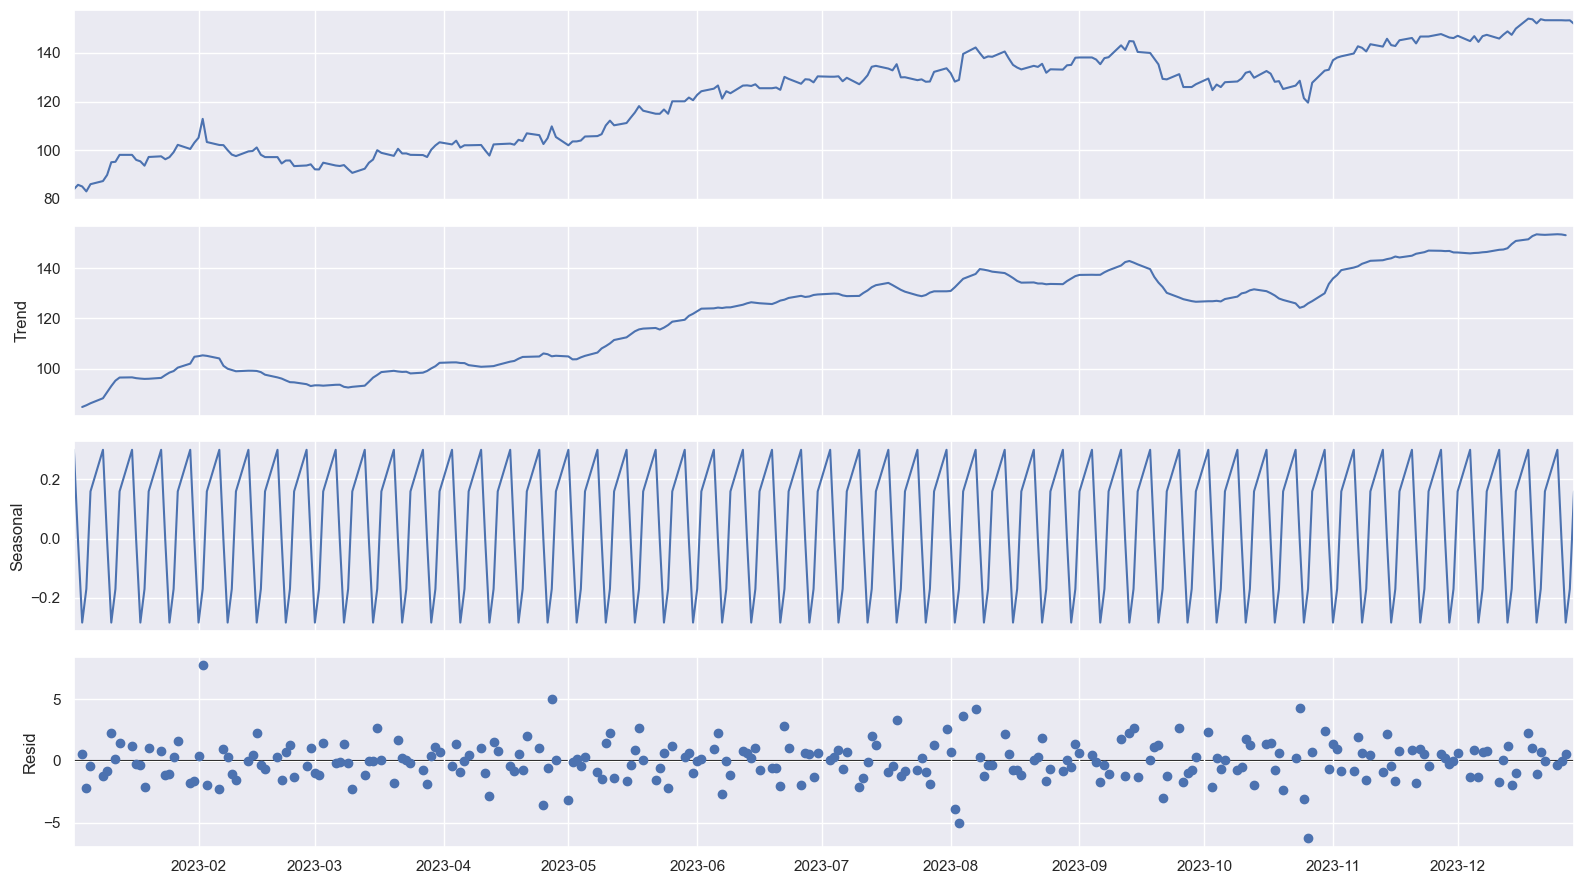

In [84]:
s_dec_additive = seasonal_decompose(df[["close"]].loc["2023"], model = "additive")
fig = s_dec_additive.plot();
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Caminata aleatoria

In [87]:
steps = np.random.normal(loc=0, scale=1, size=len(df[["close"]].loc["2023"]))

In [89]:
steps.shape

(260,)

In [91]:
P = 100 + np.cumsum(steps)

In [93]:
P = pd.DataFrame(P)

In [95]:
P.index =df[["close"]].loc["2023"].index

In [97]:
P.columns = ["Caminata Aleatoria"]

In [99]:
P

,Caminata Aleatoria
time,
2023-01-02,99.917863
2023-01-03,100.125871
2023-01-04,98.488996
2023-01-05,99.619823
2023-01-06,98.688070
...,...
2023-12-25,94.909246
2023-12-26,96.794606
2023-12-27,96.260171


<Axes: xlabel='time'>

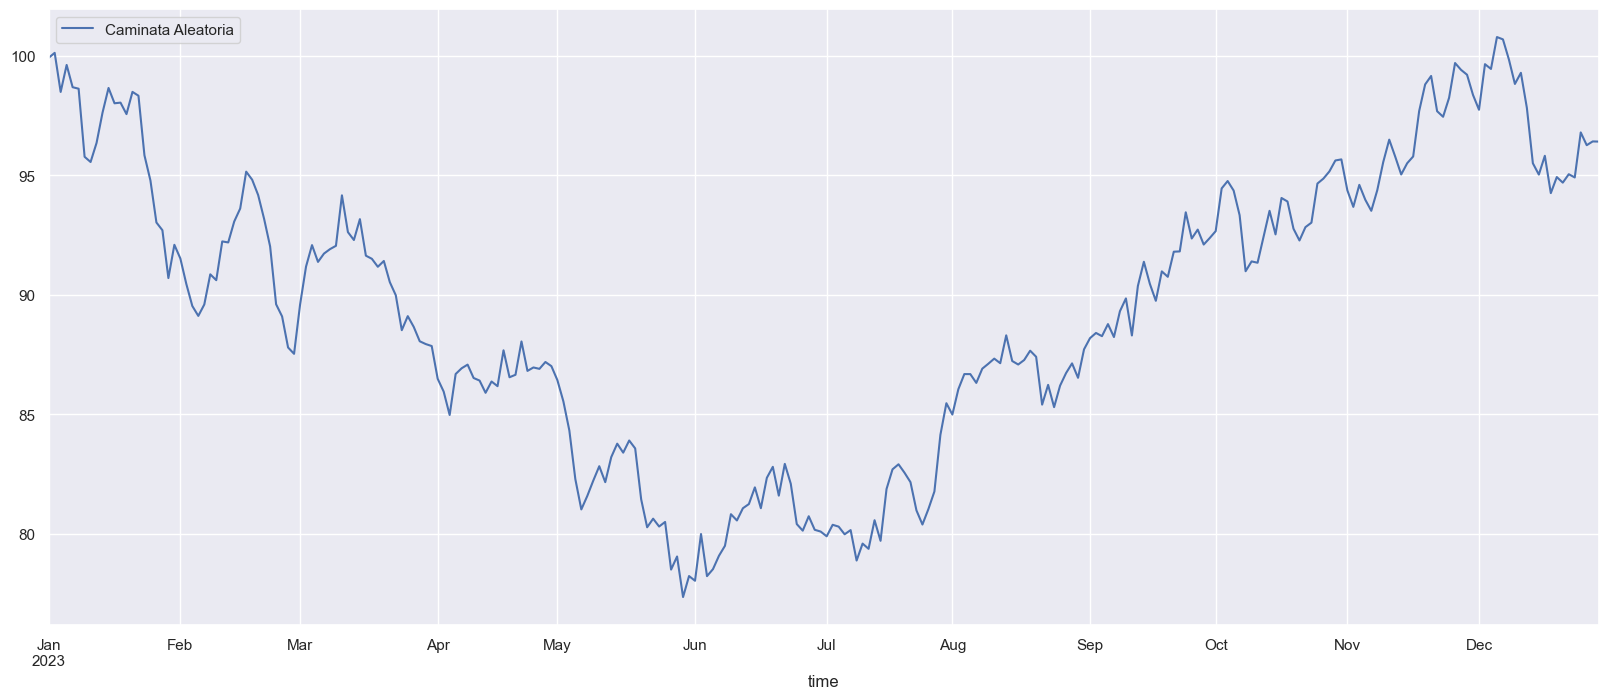

In [101]:
P.plot(figsize=(20,8))

In [103]:
P["Serie"] = df[["close"]].loc["2023"]

In [105]:
P["Ruido Blanco"] = steps

In [107]:
P.head()

,Caminata Aleatoria,Serie,Ruido Blanco
time,,,
2023-01-02,99.917863,84.000000,-0.082137
2023-01-03,100.125871,85.820000,0.208008
2023-01-04,98.488996,85.139999,-1.636875
2023-01-05,99.619823,83.120003,1.130827
2023-01-06,98.688070,86.080002,-0.931752


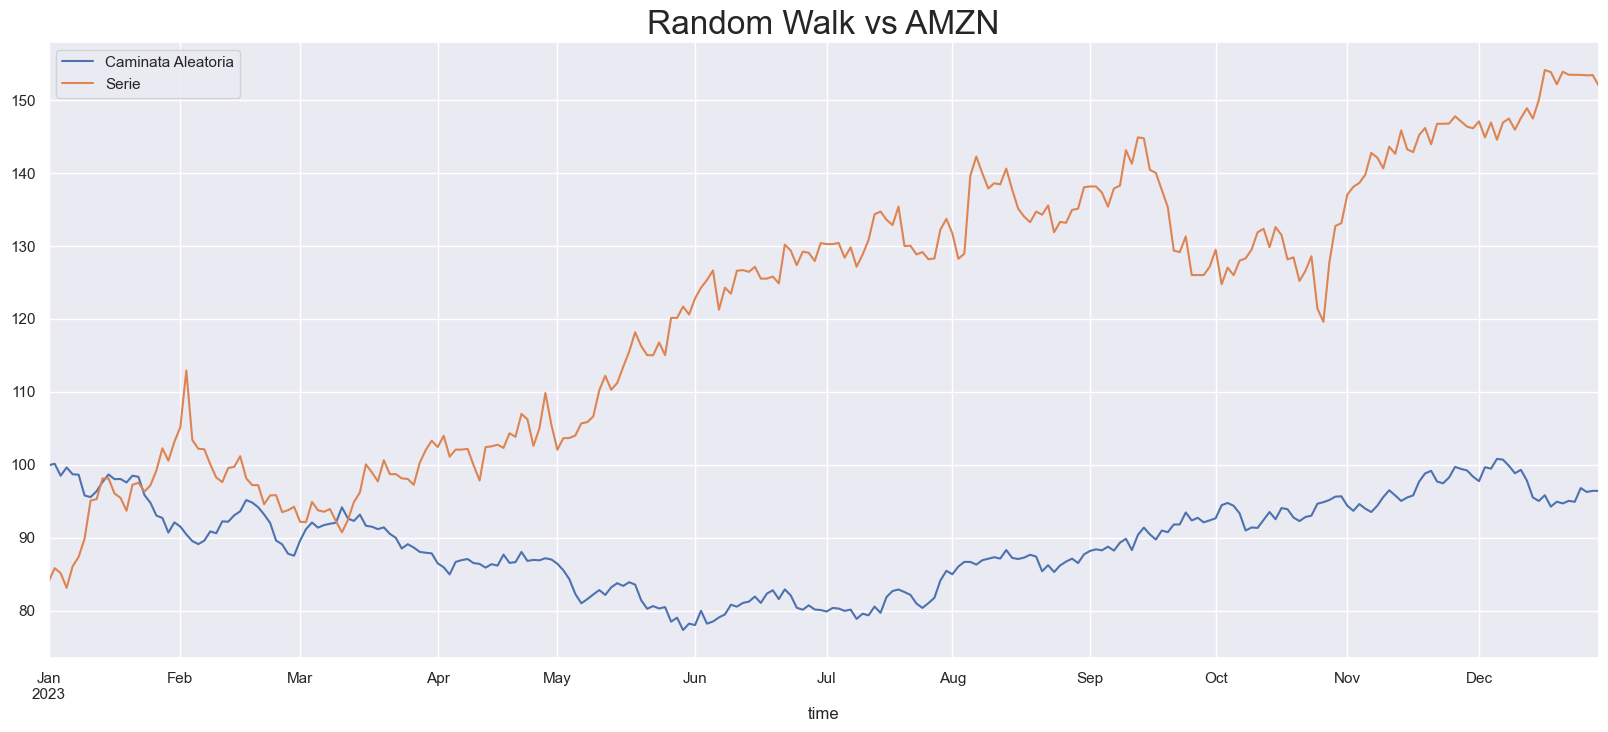

In [109]:
P["Caminata Aleatoria"].plot(figsize = (20,8))
P["Serie"].plot()
plt.title("Random Walk vs AMZN", size = 24)
plt.legend() 
plt.show()

## Función de autocorrelación ACF

https://otexts.com/fpp2/autocorrelation.html

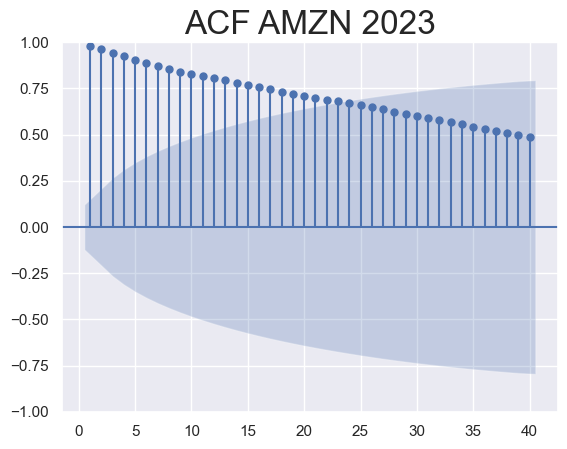

In [112]:
sgt.plot_acf(P["Serie"], lags = 40, zero = False)
plt.title("ACF AMZN 2023", size = 24)
plt.show()

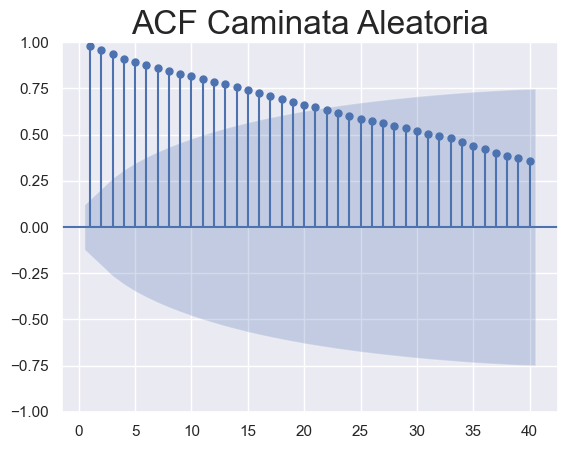

In [114]:
sgt.plot_acf(P["Caminata Aleatoria"], lags = 40, zero = False)
plt.title("ACF Caminata Aleatoria", size = 24)
plt.show()

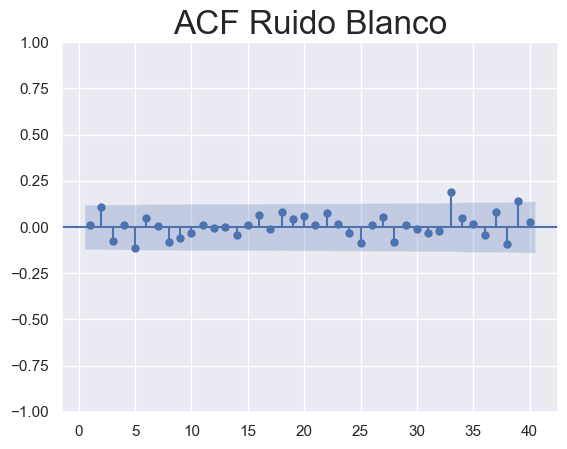

In [116]:
sgt.plot_acf(P["Ruido Blanco"], lags = 40, zero = False)
plt.title("ACF Ruido Blanco", size = 24)
plt.show()

## Función de autocorrelación parcial PACF

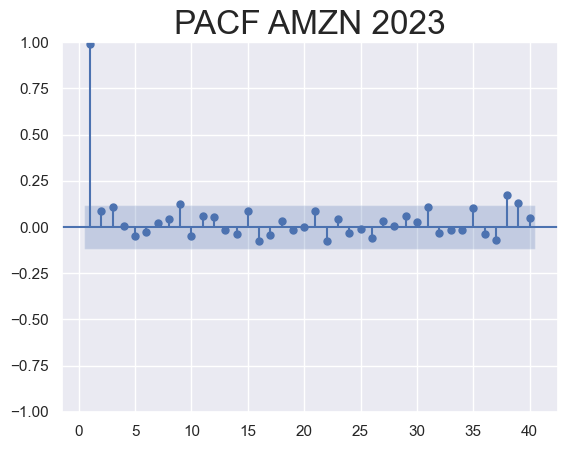

In [119]:
sgt.plot_pacf(P["Serie"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF AMZN 2023", size = 24)
plt.show()

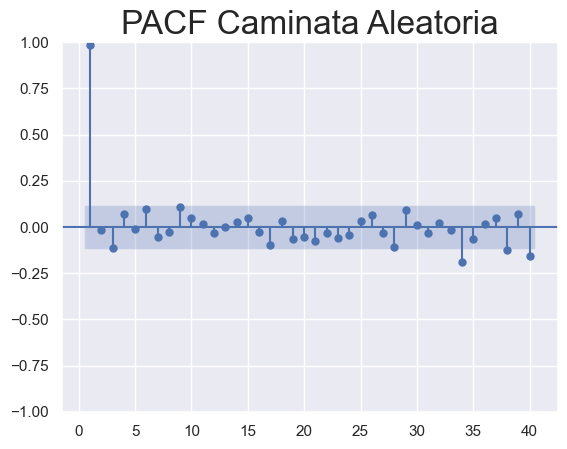

In [121]:
sgt.plot_pacf(P["Caminata Aleatoria"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Caminata Aleatoria", size = 24)
plt.show()

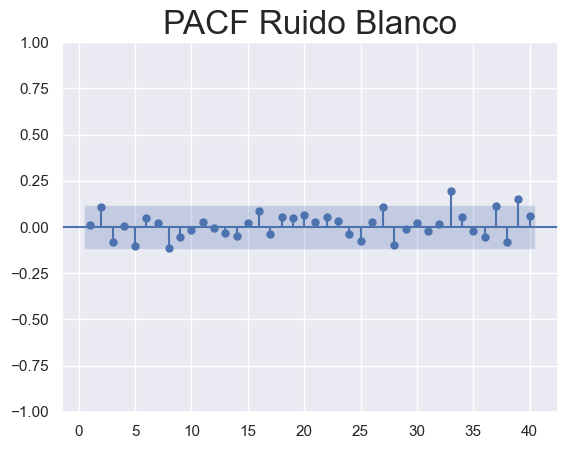

In [123]:
sgt.plot_pacf(P["Ruido Blanco"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Ruido Blanco", size = 24)
plt.show()